# Задание

Предсказать количество часов, необходимых для тестирования, исходя из количества функциональных требований и сложности тестов.

Учесть в модели наличие обратной связи

# Таблица исходных данных

| № | Функциональных требований | Сложность тестов (баллы) | Часы тестирования
|:----:|:-------:|:-----------------:|:---------------------:|
|1|10|3|30|
|2|20|4|50|
|3|15|5|60|
|4|25|2|40|
|5|30|6|70|


# Решение

Модель черного ящика может быть аппроксимирована в виде линейной функции:
$$y={𝛽_{0}}+{{𝛽_{1}}*{x_{1}}}+{{𝛽_{2}}*{x_{2}}}+{{𝛽_{3}}*{x_{3}}}$$ 
где:

- $y$ — предсказанный отклик (вероятность клика),
- $x_{1}$ — возраст,
- $x_{2}$ — количество просмотров страниц,
- $x_{3}$ — время на сайте.

Для решения задачи построим модель линейной регрессии с применением машинного обучения.

Схема модели имеет вид:

+------------------------------+
| Ввод исходных данных x{1...5}|<<-----------------------------------
+------------------------------+                                     |
                |                                                    |
                v                                                    |
+---------------------------------+    +-------------------------+   |
| Инициализация модели прогноза y |<---|     Внешние факторы     |   |
+---------------------------------+    +-------------------------+   |
                |                                                    |
                v                                                    |   
              +--------------------------------------------------------+
              |                   Прогнозные значения y                |
              +--------------------------------------------------------+

# Последовательность решения

1. Используем метод линейной регрессии для нахождения коэффициентов $𝛽_{0}$, $𝛽_{1}$, $𝛽_{2}$.
2. Строим таблицу с компонентами модели.
3. Выводим график, который показывает, как модель прогнозирует часы тестирования на основе входных данных.

Модель определения часов тестирования: y = 3.85 + 0.73 * 'Функциональных требований' + 7.91 * 'Сложность тестов'

Таблица компонентов модели:
                            Компонент  Значение
0                   Смещение (beta_0)  3.846154
1  Функциональных требований (beta_1)  0.725275
2           Сложность тестов (beta_2)  7.912088


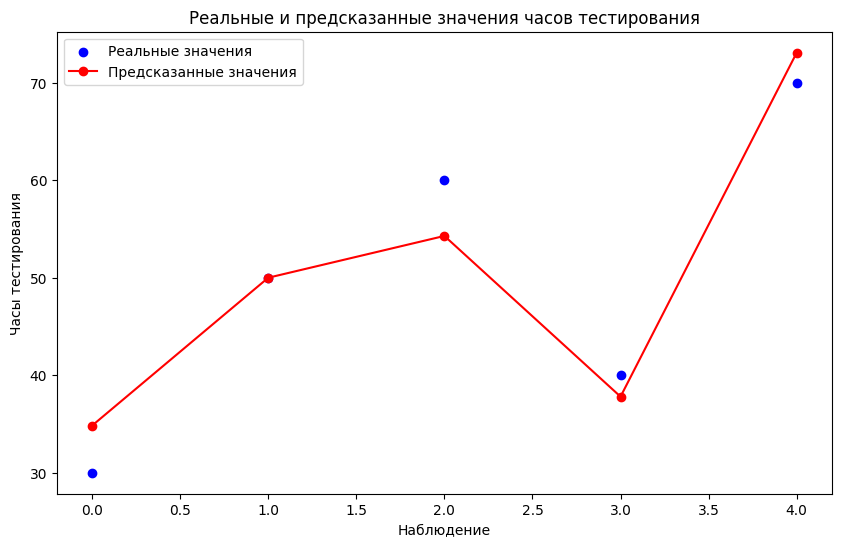

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Данные (входы и выходы)
data = {
    'Функциональных требований': [10, 20, 15, 25, 30],
    'Сложность тестов': [3, 4, 5, 2, 6],
    'Часы тестирования': [30, 50, 60, 40, 70]
}

# Преобразуем данные в DataFrame
df = pd.DataFrame(data)

# Определяем входные параметры (X) и выход (y)
X = df[['Функциональных требований', 'Сложность тестов']]
y = df['Часы тестирования']

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на данных
model.fit(X, y)

# Получаем коэффициенты модели
beta_0 = model.intercept_
beta_1, beta_2 = model.coef_

# Вывод формулы модели
print(f"Модель определения часов тестирования: y = {beta_0:.2f} + {beta_1:.2f} * 'Функциональных требований' + {beta_2:.2f} * 'Сложность тестов'")

# Таблица компонентов модели
coefficients = {
    'Компонент': ['Смещение (beta_0)', 'Функциональных требований (beta_1)', 'Сложность тестов (beta_2)'],
    'Значение': [beta_0, beta_1, beta_2]
}
coeff_df = pd.DataFrame(coefficients)
print("\nТаблица компонентов модели:")
print(coeff_df)

# Прогнозируем значения отклика для обучающей выборки
y_pred = model.predict(X)

# Визуализация реальных и предсказанных откликов
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Реальные значения')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Предсказанные значения', marker='o')
plt.xlabel('Наблюдение')
plt.ylabel('Часы тестирования')
plt.title('Реальные и предсказанные значения часов тестирования')
plt.legend()
plt.show()

# Анализ результатов

Интерпретация значений компонентов модели:

- $𝛽_{0}=3,846$ - это базовый уровень для предсказания часов тестирования, когда все входные параметры равны нулю;
- $𝛽_{1}=0,725$ - с увеличением кол-ва функциональных требований на 1 - число часов тестирования увеличивается примерно на 0,725ч;
- $𝛽_{2}=7,912$ - увеличение сложности тестов (в баллах) на 1 увеличивает кол-во часов тестирования примерно на 7,812ч;